# Use this script to analyze the data.



First, import required libraries.


Second, we define some functions for each analysis we aim to commit. Below, we introduce the functions:



 *read_data* simply takes the keyword arguments, and reads the json files.  

- **Analysis 1**

    * *find_hashtags* finds all the hashtags which have come with the query, and puts them into a data frame.
    
    * *max_hashtag* returns the hashtag which occured more frequently.
    
    * *plot_hashtags* plots a histogram to show the frequency of each hashtags which came with the query.

* **Analysis 2**
    
    * *number_of_favs* returns the frequency distribution of the number of favorites tweets are getting.
    
    * *plot_favs* plots the frequency distribution of the number of favorites tweets are getting. 

* **Analysis 3**

    *number_of_followers* finds the number of followers of people who tweets about the query.  


* **Analysis 4**

    * *country_of_tweet* finds the country from people tweet about the query.
    * *plot_countries* plots a histogram to show the frequency of each countries from people tweeted about the query.  

* **Analysis 5**
    * *average_positive* returns the average number of favorites and retweets tweets with positive attitudes are getting about the query.

In [2]:
import requests
import urllib2
import json
import base64
import pandas
from collections import Counter
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def pretty_print(jsondata) :
    print json.dumps(jsondata, indent=2)

In [110]:
def read_data(kargs):
    
    try:
        with open('./search/'+kargs['q']+'.json' ,'r') as json_data:
            data = json.load(json_data)
    except IOError:
        with open('./search/'+kargs['q'][:4]+'.json' ,'r') as json_data:
            data = json.load(json_data)
            
    return data
    


In [6]:
def max_hashtag(df_hash):
    max_hash = df_hash.idxmax(axis=0)
    print '#'+ max_hash + ' has appeared more frequently with the query.'

In [7]:
def find_hashtags(kargs,min_freq = 5):
    with open('./search/'+kargs['q']+'.json' ,'r') as json_data:
        data = json.load(json_data)
    other_hashtages = []
    for item in data:

        for i in item['entities']['hashtags']:
            if (i['text']).encode('utf-8') in kargs['q']:
                continue
            else:
                other_hashtages.append((i['text']).encode('utf-8'))
    hashtag_counts = Counter(other_hashtages)
    df = pandas.DataFrame.from_dict(hashtag_counts, orient='index')
    df.columns = ['freq']
    df = df[df.freq>min_freq]
    if kargs['q'] in df.index:
        df_hash = df.drop([kargs['q']])
    else:
        df_hash = df
        
    return df_hash
    


In [66]:
def plot_hashtags(dataframe,color = 'r'):
    
    dataframe_norm = dataframe.freq/dataframe.freq.sum()
    data_norm = dict(dataframe_norm)
    plt.figure(figsize=(16,9))
    plt.bar(range(len(data_norm)), data_norm.values(),color = color,align='center')
    plt.xticks(range(len(data_norm)),list(data_norm.keys()),rotation=45,ha='right')
    


## Analysis 1:

Here, we want to see what other hashtags have tweeted with our query.





In [24]:
key_words_list_U = ["#MUFC", "#mufc", "#Mufc"]
key_words_str_U = " OR ".join(key_words_list_U)
kargs_U = {'q':key_words_str_U,'lang':'en','count':100,'per_page':50}
other_hashtags_U = find_hashtags(kargs_U,min_freq = 50)
frequent_hashtag_U = max_hashtag(other_hashtags_U)

freq    #UEL has appeared more frequently with the query.
dtype: object


In [25]:
key_words_list_C = ["#MCFC", "#mcfc", "#Mcfc"]
key_words_str_C = " OR ".join(key_words_list_C)
kargs_C = {'q':key_words_str_C,'lang':'en','count':100,'per_page':100}
other_hashtags_C = find_hashtags(kargs_C,min_freq = 50)
frequent_hashtag_C = max_hashtag(other_hashtags_C)

freq    #cityvsaints has appeared more frequently with...
dtype: object


We plot the frequency of hashtags coming along with each query.

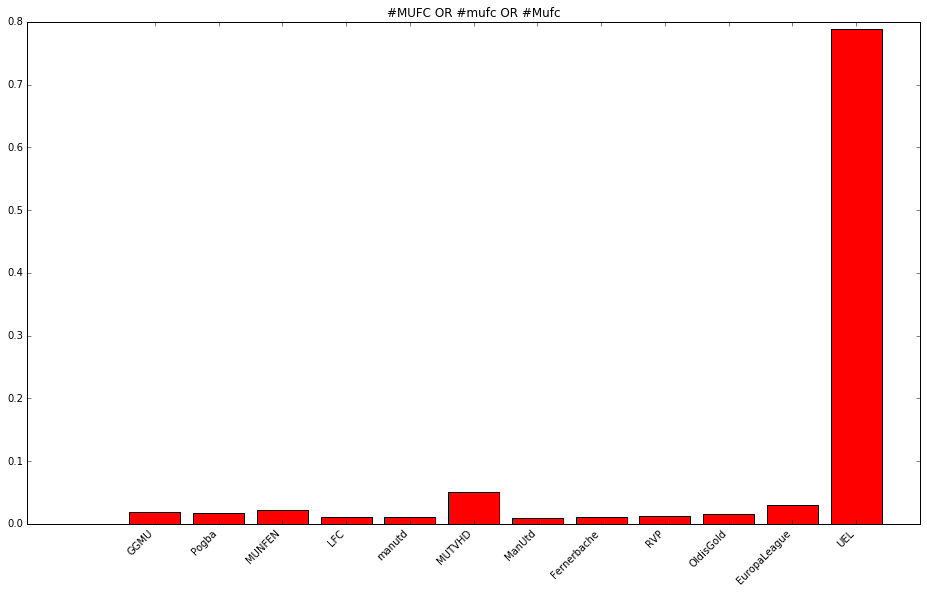

In [67]:
plot_hashtags(other_hashtags_U,color='r')
plt.title(kargs_U['q'])

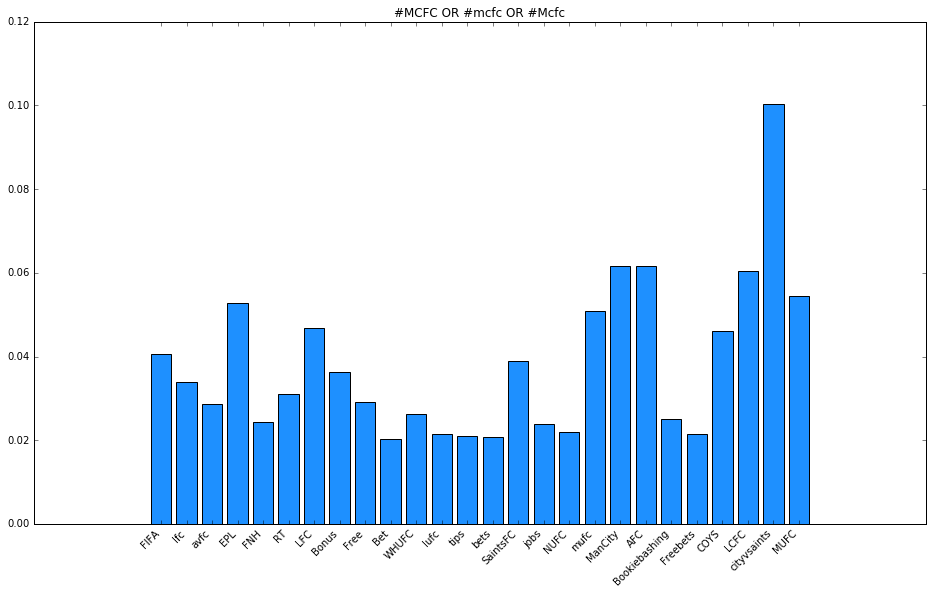

In [68]:
plot_hashtags(other_hashtags_C, color = 'dodgerblue')
plt.title(kargs_C['q'])

## Analysis 2: 

Here, we want to see how many *favorites* theses tweets have been getting.




In [36]:
def number_of_favs(kargs):
    data = read_data(kargs)
    fav = []
    for i in range(len(data)):
        if data[i]['favorite_count'] != 0:
            fav.append(data[i]['favorite_count'])
        
    fav = Counter(fav)
    fav_dict = dict(fav)
    
    return fav_dict
    

In [49]:
def plot_favs(fav_dict,color='r'):
    plt.figure(figsize=(16,9))
    plt.bar(fav_dict.keys(), fav_dict.values(),color=color)
    xlim(min(fav_dict.keys()),max(fav_dict.keys()))
    ylim(min(fav_dict.values()), max(fav_dict.values()))
    

In [37]:
fav_U = number_of_favs(kargs_U)
fav_C = number_of_favs(kargs_C)

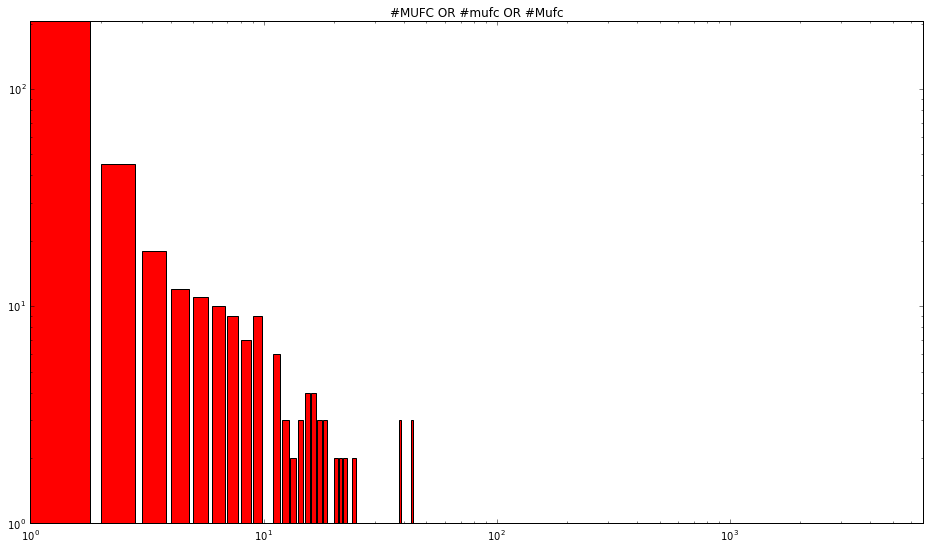

In [53]:
plot_favs(fav_U)
xscale('log')
yscale('log')
plt.title(kargs_U['q'])

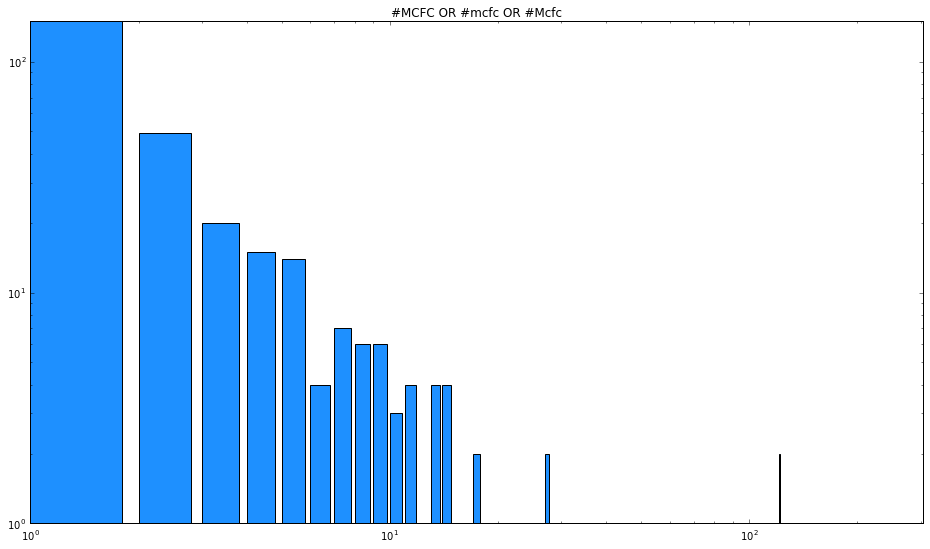

In [54]:
plot_favs(fav_C,color = 'dodgerblue')
xscale('log')
yscale('log')
plt.title(kargs_C['q'])

We can conclude from these two plots that if you tweet about Manchester United, you are more probable to get favourites!

## Analysis 3:



In [71]:
def number_of_followers(kargs):
    data = read_data(kargs)
    followers = []
    for i in range(len(data)):
        if data[i]['user']['followers_count'] != 0:
            followers.append(data[i]['user']['followers_count'])
        
    followers = Counter(followers)
    followers = dict(followers)
    
    return followers
    

In [72]:
followers_count_U = number_of_followers(kargs_U)
followers_count_C = number_of_followers(kargs_C)

We can use the same function as before (*plot_fav*) to plot the results.

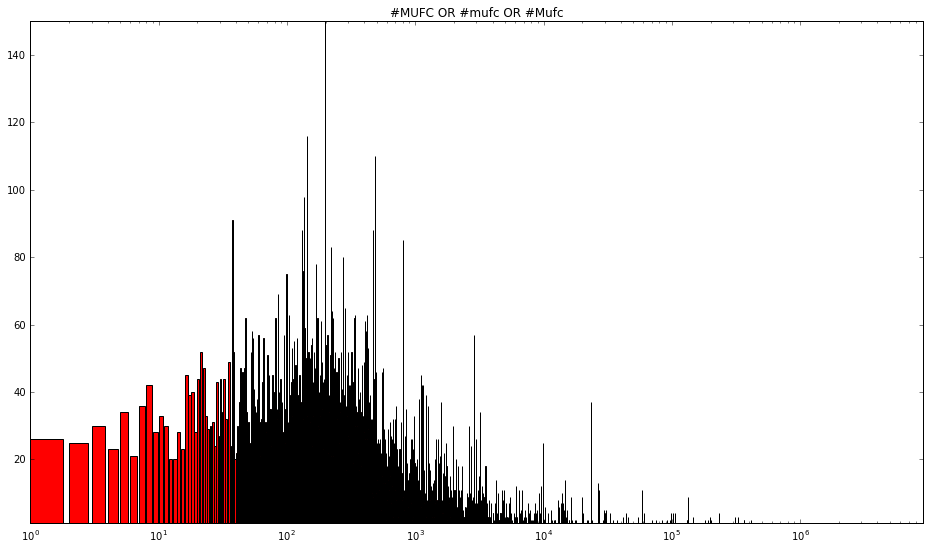

In [83]:
plot_favs(followers_count_U ,color = 'red')
xscale('log')
# yscale('log')
plt.title(kargs_U['q'])

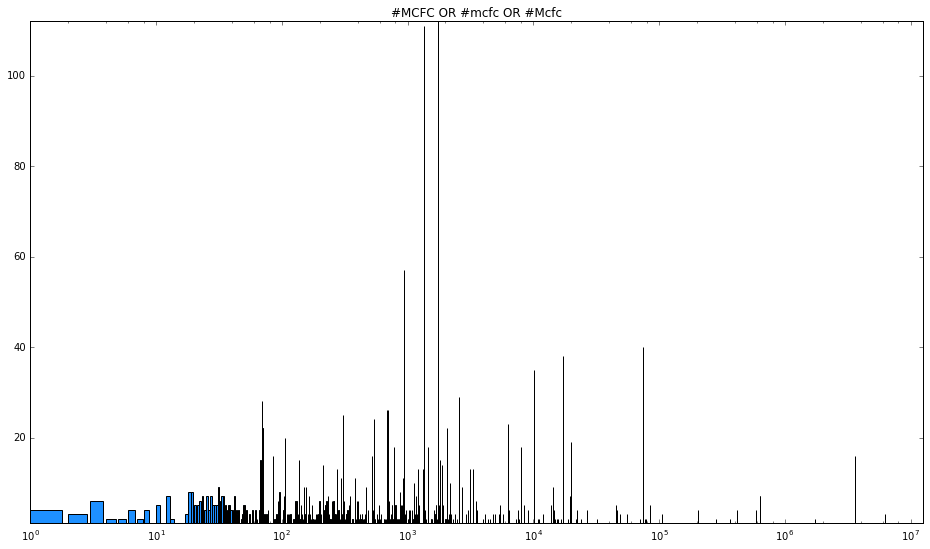

In [77]:
plot_favs(followers_count_C ,color = 'dodgerblue')
xscale('log')
# yscale('log')
plt.title(kargs_C['q'])

From these two plots, we conclude people who tweets about Manchester United usually have more followers!

## Analysis 4:


In [92]:
def country_of_tweet(kargs):
    data = read_data(kargs)
    countries = []
    for i in range(len(data)):
        if data[i]['place']:
            countries.append(data[i]['place']['country'])
        else:
            continue

    countries = Counter(countries)
    countries = dict(countries)
    
    return countries
    

In [86]:
def plot_countries(countries,color = 'r'):
    
    plt.figure(figsize=(16,9))
    plt.bar(range(len(countries)), countries.values(),color = color,align='center')
    plt.xticks(range(len(countries)),list(countries.keys()),rotation=45,ha='right')

In [93]:
country_of_tweet_U = country_of_tweet(kargs_U)
country_of_tweet_C = country_of_tweet(kargs_C)

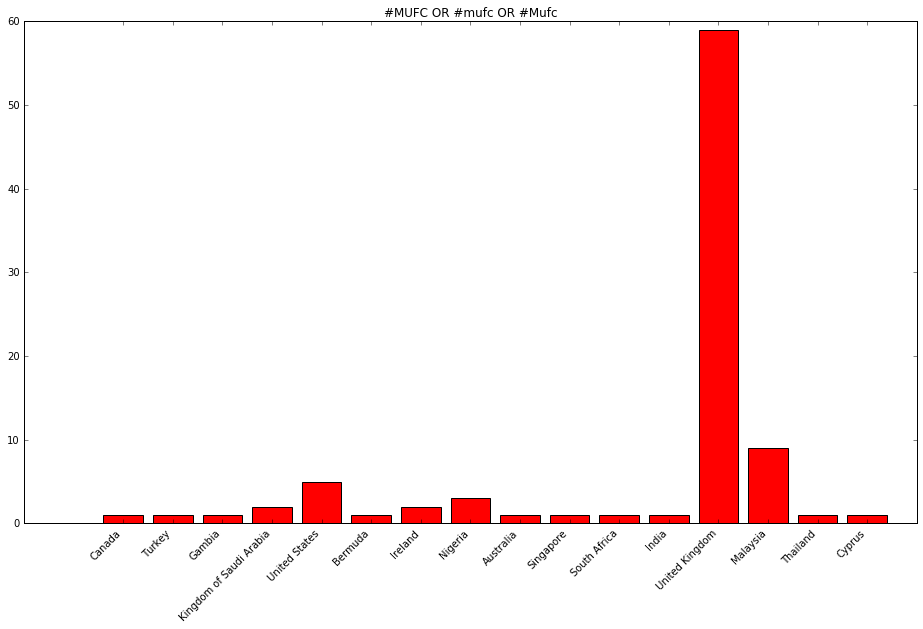

In [87]:
plot_countries(country_of_tweet_U ,color = 'red')
plt.title(kargs_U['q'])

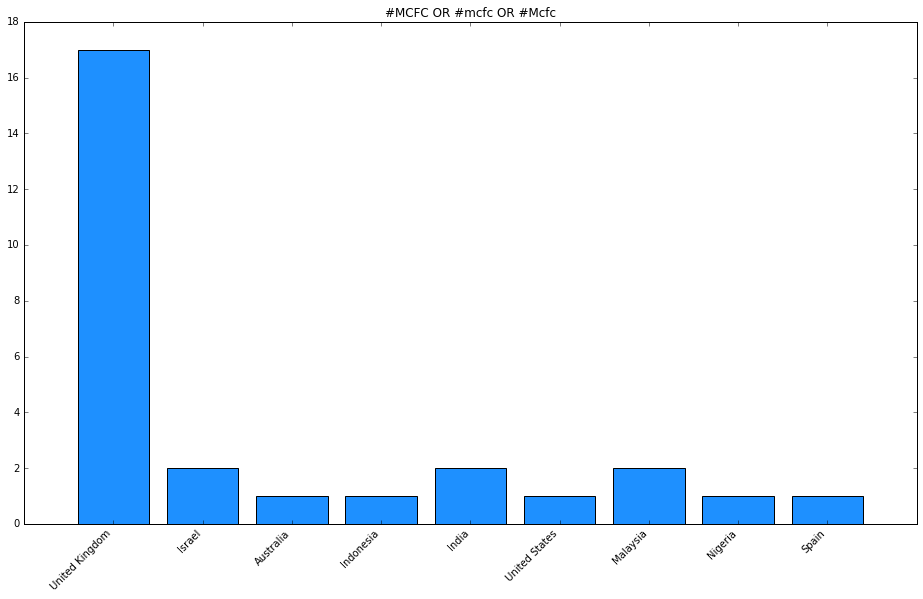

In [94]:
plot_countries(country_of_tweet_C ,color = 'dodgerblue')
plt.title(kargs_C['q'])

## Analysis 5:

In [96]:
key_words_list_U = ["MUFC :)", "mufc :)", "Mufc :)", "ManUtd :)"]
key_words_str_U = " OR ".join(key_words_list_U)
kargs_U_feeling = {'q':key_words_str_U,'count':100,'per_page':100}

key_words_list_C = ["MCFC :)", "mcfc :)", "Mcfc :)", "ManCity :)"]
key_words_str_C = " OR ".join(key_words_list_C)
kargs_C_feeling = {'q':key_words_str_C,'count':100,'per_page':100}

In [129]:
def average_positive(kargs):
    data = read_data(kargs)
    favs = []
    retweets = []
    
    for i in range(len(data)):
        if data[i]['favorite_count']!=0:
            favs.append(data[i]['favorite_count'])
        if data[i]['retweet_count']!=0:
            retweets.append(data[i]['retweet_count'])

        else:
            continue

    ave_fav = np.average(favs)
    std_fav = np.std(favs)

    ave_retweet = np.average(retweets)
    std_retweets = np.std(retweets)
    
    print 'The average number of favs that positive tweets about '+kargs['q']+' gets = '+str(ave_fav)
    print 'with standard deviation equal to '+ str(std_fav)
    
    
    print('')
    print 'The average number of retweets that positive tweets about '+kargs['q']+' gets = '+str(ave_retweet)
    print 'with standard deviation equal to '+ str(std_retweets)


    

In [131]:
ave_fav_positive_U = average_positive(kargs_U_feeling)


The average number of favs that positive tweets about MUFC :) OR mufc :) OR Mufc :) OR ManUtd :) gets = 2.15060240964
with standard deviation equal to 3.43198539238

The average number of retweets that positive tweets about MUFC :) OR mufc :) OR Mufc :) OR ManUtd :) gets = 549.024
with standard deviation equal to 1990.22571771


In [132]:
ave_fav_positive_C = average_positive(kargs_C_feeling)

The average number of favs that positive tweets about MCFC :) OR mcfc :) OR Mcfc :) OR ManCity :) gets = 3.78
with standard deviation equal to 8.14442140364

The average number of retweets that positive tweets about MCFC :) OR mcfc :) OR Mcfc :) OR ManCity :) gets = 1442.07954545
with standard deviation equal to 3738.84218291
